# Initial exploratory analysis

## Provided Description

Dataset Description

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

File descriptions

1. sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
2. test.csv - the test set. **You need to forecast the sales for these shops and products for November 2015.**
3. sample_submission.csv - a sample submission file in the correct format.
4. items.csv - supplemental information about the items/products.
5. item_categories.csv - supplemental information about the items categories.
6. shops.csv- supplemental information about the shops.

Data fields

1. ID - an Id that represents a (Shop, Item) tuple within the test set
2. shop_id - unique identifier of a shop
3. item_id - unique identifier of a product
4. item_category_id - unique identifier of item category
5. item_cnt_day - number of products sold. **You are predicting a monthly amount of this measure**
6. item_price - current price of an item
7. date - date in format dd/mm/yyyy
8. date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
9. item_name - name of item
10. shop_name - name of shop
11. item_category_name - name of item category

This challenge serves as final project for the "How to win a data science competition" Coursera course.
https://www.coursera.org/learn/competitive-data-science/home/welcome

In this competition you will work with a challenging time-series dataset consisting of daily sales data, 
kindly provided by one of the largest Russian software firms - 1C Company. https://1c.ru/eng/title.htm

We are asking you to **predict total sales for every product and store in the next month.** By solving this competition you will be able to apply and enhance your data science skills.

## Loading data into dataframes

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [54]:
# Copy data (competitive-data-science-final-project.zip) one level before the current directory
# and extract once. 
# Secondary extraction is done with pandas read_csv

In [55]:
# Dropping this table as it is as same as item_categories and not mentioned in the initial data description
# df_item_cats = pd.read_csv('competitive-data-science-final-project/item_cats.csv')

In [56]:
df_item_categories = pd.read_csv('../competitive-data-science-final-project/item_categories.csv')

In [57]:
df_items = pd.read_csv('../competitive-data-science-final-project/items.csv')

In [58]:
df_shops = pd.read_csv('../competitive-data-science-final-project/shops.csv')

In [59]:
df_train = pd.read_csv('../competitive-data-science-final-project/sales_train.csv.gz', compression='gzip')

In [60]:
df_test = pd.read_csv('../competitive-data-science-final-project/test.csv.gz', compression='gzip')

In [61]:
#df_item_categories.compare(df_item_cats)

## Explore data 

In [62]:
def explore(df):
    summary_df = pd.DataFrame()
    
    for i in df.columns:
        line_df = pd.DataFrame([i, 
                                df[i].dtype, 
                                df[i].count(), 
                                df[i].min(), 
                                df[i].max(), 
                                df[i].nunique(), 
                                df[i].isna().sum()]
                              )
        summary_df = pd.concat([ summary_df,line_df], axis=1)
        #summary_df = summary_df.concat()
    summary_df.index = [ "Column_name","dtype", "Total", "Min", "Max", "nUnique", "Nullcount"]
    #Making the first row the column header
    summary_df.columns = summary_df.iloc[0]
    summary_df = summary_df[1:]
    
    return(summary_df)

In [63]:
explore(df_train)

Column_name,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
dtype,object,int64,int64,int64,float64,float64
Total,2935849,2935849,2935849,2935849,2935849,2935849
Min,01.01.2013,0,0,0,-1.0,-22.0
Max,31.12.2014,33,59,22169,307980.0,2169.0
nUnique,1034,34,60,21807,19993,198
Nullcount,0,0,0,0,0,0


In [64]:
explore(df_test)

Column_name,ID,shop_id,item_id
dtype,int64,int64,int64
Total,214200,214200,214200
Min,0,2,30
Max,214199,59,22167
nUnique,214200,42,5100
Nullcount,0,0,0


In [65]:
explore(df_item_categories)

Column_name,item_category_name,item_category_id
dtype,object,int64
Total,84,84
Min,PC - Гарнитуры/Наушники,0
Max,Элементы питания,83
nUnique,84,84
Nullcount,0,0


In [66]:
explore(df_items)

Column_name,item_name,item_id,item_category_id
dtype,object,int64,int64
Total,22170,22170,22170
Min,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,0
Max,Яйцо дракона (Игра престолов),22169,83
nUnique,22170,22170,84
Nullcount,0,0,0


In [67]:
explore(df_shops)

Column_name,shop_name,shop_id
dtype,object,int64
Total,60,60
Min,"!Якутск Орджоникидзе, 56 фран",0
Max,"Ярославль ТЦ ""Альтаир""",59
nUnique,60,60
Nullcount,0,0


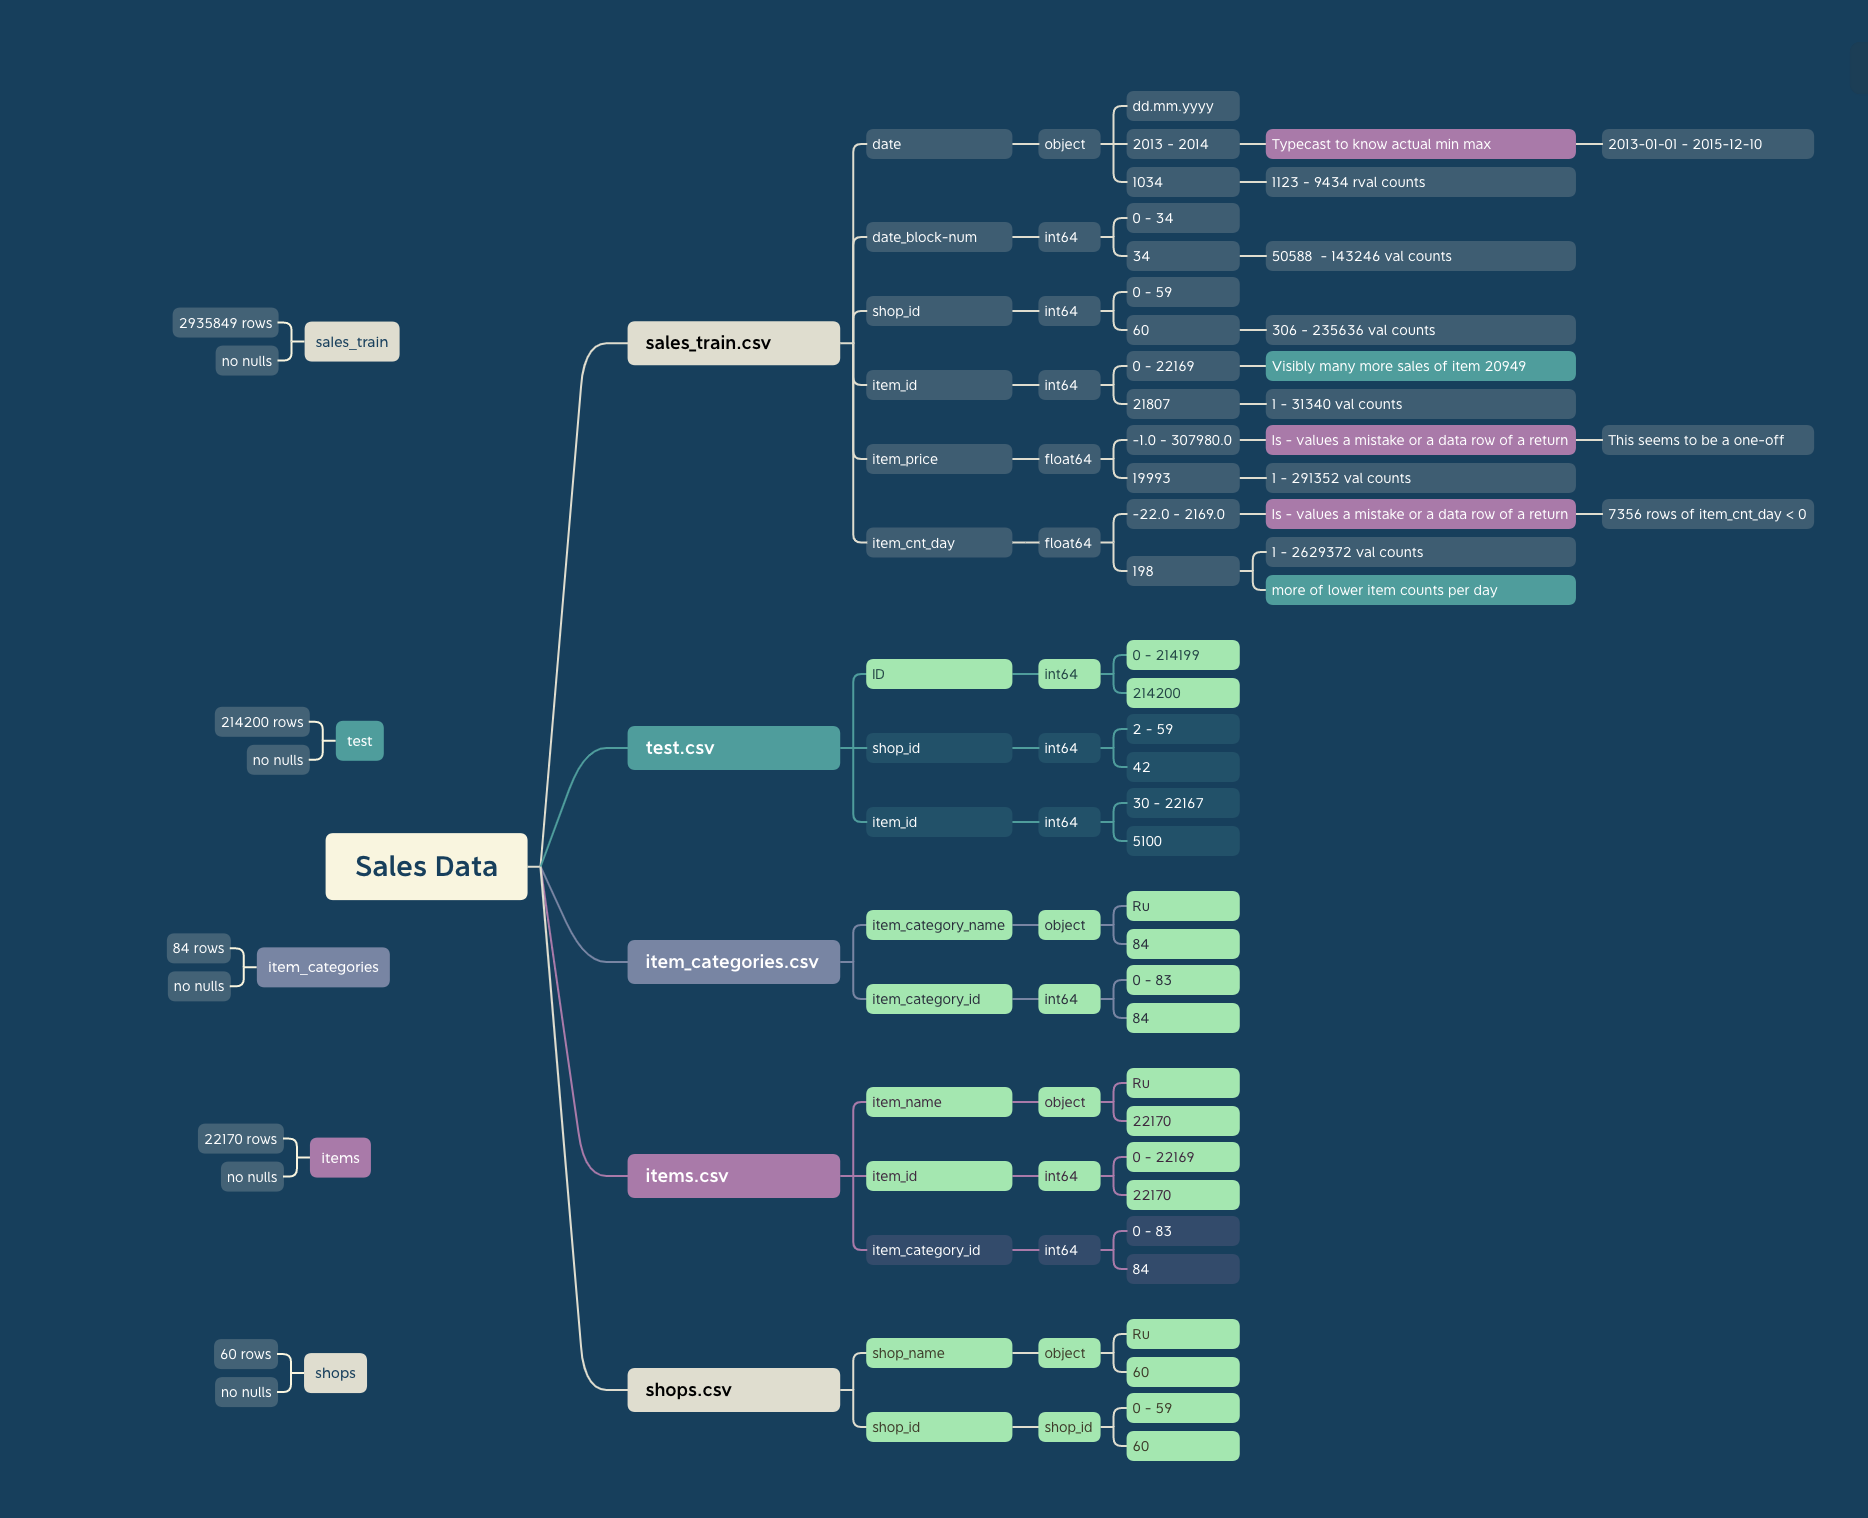

## Exploring value counts distribution

In [68]:
def val_counts(df):
    for i in df.columns:
        print(df[i].value_counts(dropna=False))

In [69]:
val_counts(df_train)

28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
              ... 
14.05.2015    1174
28.04.2015    1154
06.10.2015    1152
13.05.2015    1128
12.05.2015    1123
Name: date, Length: 1034, dtype: int64
11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64
31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53

In [70]:
val_counts(df_test)

0         1
142765    1
142793    1
142794    1
142795    1
         ..
71403     1
71404     1
71405     1
71406     1
214199    1
Name: ID, Length: 214200, dtype: int64
5     5100
56    5100
53    5100
52    5100
47    5100
48    5100
57    5100
58    5100
59    5100
55    5100
36    5100
4     5100
37    5100
35    5100
38    5100
34    5100
46    5100
41    5100
44    5100
39    5100
49    5100
50    5100
42    5100
19    5100
6     5100
3     5100
2     5100
7     5100
10    5100
12    5100
28    5100
31    5100
26    5100
25    5100
22    5100
24    5100
21    5100
15    5100
16    5100
18    5100
14    5100
45    5100
Name: shop_id, dtype: int64
5037     42
17184    42
15764    42
15760    42
15673    42
         ..
13397    42
14126    42
14064    42
14151    42
969      42
Name: item_id, Length: 5100, dtype: int64


* df_train has a unique ID
* ID consists of shop ID: item ID combination
* Since shop ID could have 1 or 2 digits without leading zeros and item id could have 1 to 5 digits without leading zeros,
using this column alone and trying to seperate later might cause issues. (Do not know where to split)
* Not all item IDs and Shop IDs are included in the testing dataset
* Each item_id has exactly 42 rows each and each shop_id has 5100 rows each

In [71]:
df_test.item_id.nunique()

5100

In [72]:
df_test.shop_id.nunique()

42

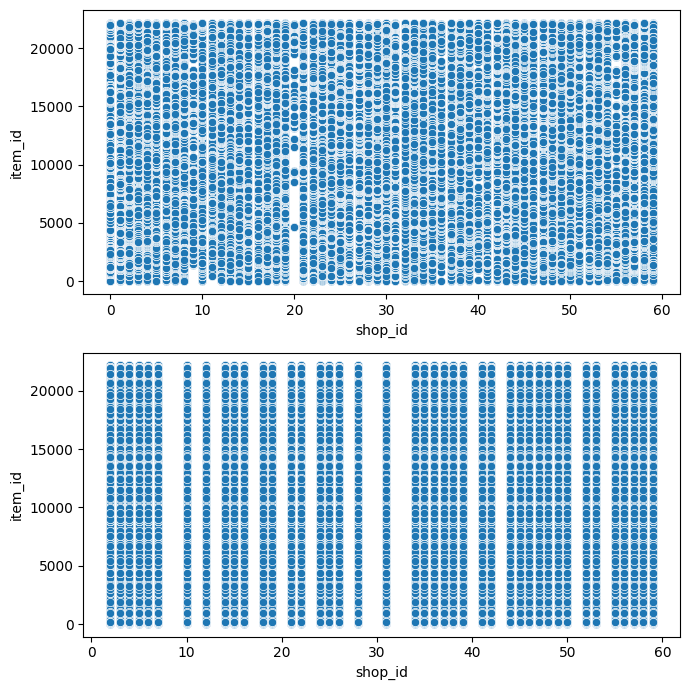

In [73]:
# Comparing the distribution of item_id vs shop_id in training and testing datasets
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 1)

sns.scatterplot(data = df_train, x = "shop_id", y = "item_id", ax=axes[0])
sns.scatterplot(data = df_test, x = "shop_id", y = "item_id", ax=axes[1])

plt.show()

* Should we keep the data outside of the 5100 unique item_ids and 42 unique shop ID's used in the test dataset?

## Exploring the number of negative values in item_price and item_cnt_day

In [74]:
df_train.loc[df_train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [75]:
df_train.loc[(df_train.item_id == 2973) & 
             (df_train.shop_id == 32) #& 
            # (df_train.date_block_num == 4)
            ]#.item_price.value_counts()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
67427,29.01.2013,0,32,2973,2499.0,1.0
67428,25.01.2013,0,32,2973,2499.0,1.0
67429,22.01.2013,0,32,2973,2499.0,1.0
67430,21.01.2013,0,32,2973,2499.0,1.0
67431,18.01.2013,0,32,2973,2499.0,1.0
67432,17.01.2013,0,32,2973,2499.0,1.0
67433,15.01.2013,0,32,2973,2499.0,3.0
187844,05.02.2013,1,32,2973,2499.0,1.0
187845,14.02.2013,1,32,2973,2499.0,1.0
484682,23.05.2013,4,32,2973,1249.0,1.0


In [76]:
df_train.loc[(df_train.item_id == 2973)].item_price.round(2).value_counts()

 2499.00    444
 1249.50    124
 1249.00     96
 1901.00     28
 2498.50     12
 1250.00     12
 1562.03     10
 1275.01      9
 2498.75      6
 1837.85      3
 1275.27      3
 1329.29      3
 1487.61      3
 1999.00      3
 1453.00      2
 2498.90      2
 1523.91      1
 1297.58      1
 1388.40      1
 1248.70      1
 1454.12      1
-1.00         1
 2248.80      1
 1049.00      1
 1248.90      1
 2427.57      1
 1249.10      1
 1998.40      1
 2498.40      1
 2498.70      1
 2373.95      1
 2249.00      1
 2498.88      1
 2498.92      1
 2498.83      1
 1832.37      1
Name: item_price, dtype: int64

* The minus value for item_price seems to be a one off. This could be adjusted/dropped
* If adjusted probably a mean value from the value distribution. If not significant, could be dropped.

In [77]:
df_train.loc[df_train.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [78]:
df_train.loc[df_train.item_cnt_day < 0].shop_id.value_counts()

31    451
12    430
54    356
25    316
57    314
6     261
42    251
28    216
19    211
43    211
56    195
47    193
58    173
44    165
53    163
38    162
27    157
37    154
29    151
52    143
16    139
59    137
30    135
26    134
18    132
50    130
15    130
35    128
21    125
4     124
14    120
3     119
24    103
45    103
46    102
7      99
22     97
48     89
5      85
41     82
2      80
17     80
49     42
39     37
32     34
34     25
33     22
23     17
40     13
9       8
8       6
36      3
55      2
20      1
Name: shop_id, dtype: int64

There seems to be many more minus values in terms of item_cnt_day. This could be considered as returns and kept.

## Typecasting the date column, inplace

In [79]:
df_train['date']= pd.to_datetime(df_train['date'], dayfirst=True)

In [80]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [81]:
df_train.date.min()

Timestamp('2013-01-01 00:00:00')

In [82]:
df_train.date.max()

Timestamp('2015-10-31 00:00:00')

## Validating date_block_num column

In [83]:
# Adding a Month_Year column to validate the date_block_num column numbers

In [84]:
df_train['Month_Year'] = df_train['date'].dt.to_period('M')
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01


In [85]:
import seaborn as sns

In [86]:
df_train.sort_values(by = "Month_Year", inplace = True)

<AxesSubplot: xlabel='date_block_num', ylabel='Count'>

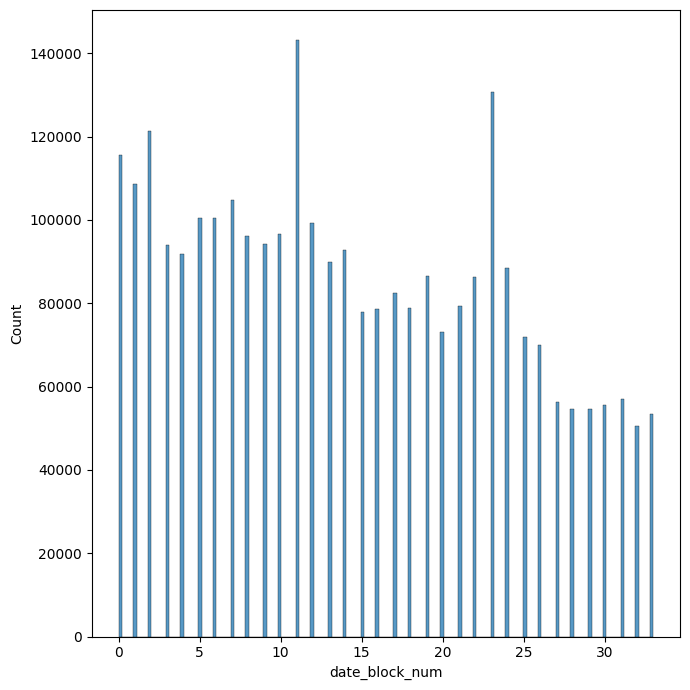

In [87]:
sns.histplot(data = df_train, x = "date_block_num")